## Exploring Graph Datasets


In [1]:
#Import packages
import osmnx as ox
import networkx as nx
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

### Load data into the coding environment

In [2]:
#Load in the NC road network
nc_graph = ox.load_graphml('NC_roads.graphml',folder='../Data/OSM/')

In [4]:
#Convert the graph to geodataframes of nodes and edges
#https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.save_load.graph_to_gdfs
nodes_gdf, edges_gdf = ox.graph_to_gdfs(nc_graph)

In [58]:
#Load in the DCFC locations as pandas dataframe
dcfc_df = pd.read_csv('../Data/NREL/DCFC.csv')

In [59]:
#Convert to a geopandas dataframe
geom_points = [Point(xy) for xy in zip(dcfc_df['longitude'],dcfc_df['latitude'])]
dcfc_gdf = gpd.GeoDataFrame(dcfc_df,geometry=geom_points,crs=4326)

In [60]:
#Load the exits in as a geodataframe
exits_gdf = gpd.read_file('../Data/MJBA/Exits.shp')

#### Locate nodes nearest exit features and add as exit attribute

In [78]:
#Function to return the ID of the node nearest a point geometry
def get_node(thePoint):
    return ox.get_nearest_node(nc_graph,(thePoint.y,thePoint.x))

In [79]:
#Apply the function to each exit feature, inserting values into a column of node_ids 
exits_gdf['node_id'] = exits_gdf['geometry'].apply(get_node)

In [100]:
#Apply the function to each DCFC feature, inserting values into a column of node_ids
dcfc_gdf['node_id'] = dcfc_gdf['geometry'].apply(get_node)

### Visualize the data


In [101]:
#Make a list of exit node ids
exit_nodes = exits_gdf['node_id'].unique()
dcfc_nodes = dcfc_gdf['node_id'].unique()

In [115]:
#Set node colors based on whether an exit or not
node_colors = []
node_sizes = []
for node in nc_graph.nodes():
    if node in dcfc_nodes: 
        node_colors.append('green')
        node_sizes.append(52)
    elif node in exit_nodes:
        node_colors.append('red')
        node_sizes.append(35)
    else:
        node_colors.append('blue')
        node_sizes.append(2)

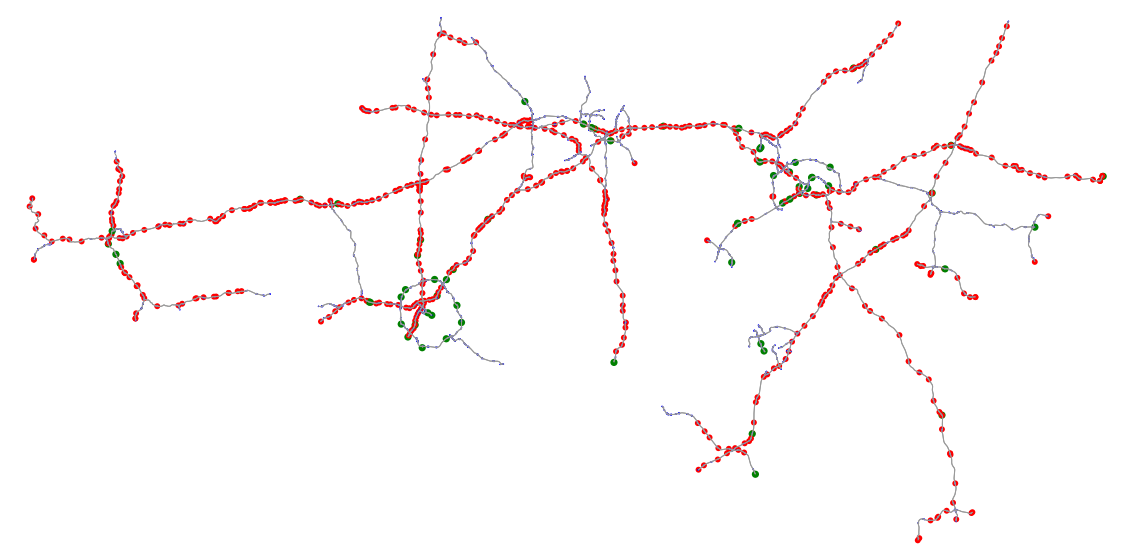

In [116]:
#Plot the graph, applying node symbolization created above
fig, ax = ox.plot_graph(nc_graph, 
                        fig_height=10,
                        node_size=node_sizes,
                        node_color=node_colors);

In [117]:
#Save the plot
fig, ax = ox.plot_graph(nc_graph, 
                        fig_height=10,
                        node_size=node_sizes,
                        node_color=nc,
                        save=True,
                        filename='graph',
                        show=False
                       )

![]('images/graphp